# **2주차 - 2** : Monte Carlo integration

**Area Ratio** : 넓이비 방법

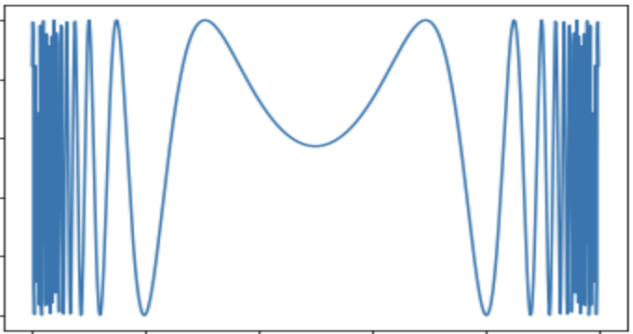

- 구하려는 식의 실제 적분 값 : $I = \int_{a}^{b} f(x) dx$
- 식의 그래프가 포함되는 사각형의 넓이 : $A = [a, b] \times [f_{min}, f_{max}]$
- 랜덤한 점의 전체 개수 : $N$
- 식의 그래프의 아래에 있는 랜덤한 점의 개수 : $M$
- 랜덤한 점이 식의 그래프의 아래에 있을 확률 : $p$
  > $p = \frac{I}{A}$

  > $<M> = pN$
  
  > $I = pA \approx A\frac{M}{N}$

# **Q1 - (a)**
랜덤한 점 $N = 1000$을 이용하여, 원의 넓이를 계산하는 몬테칼로 프로그램을 작성하여 원주율의 추정치 $π_s$를 구하고 참값 $π$와의 오차를 구하라.

1. -1 ~ 1 사이의 난수를 $N = 1000$개 지정
2. 원 안($x^2 + y^2 < 1$)에 들어있는 점 개수($M$) 세기
3. $I = \int_{a}^{b} f(x) dx$
> $I = $ 원의 넓이 $ = \pi R^2 = \pi 1^2 = \pi$
4. $A = [a, b] \times [f_{min}, f_{max}]$
> $A = $ 원이 포함된 사각형의 넓이 $= 2\times2 = 4$
5. $p = \frac{I}{A}$
> $p = \frac{\pi}{4}$
6. $I = pA \approx A\frac{M}{N}$
> $I = \pi = p\times4 \approx \frac{M}{N} × 4$
7. $\pi_s = 4\frac{M}{N}$

원주율 추정치 : 3.076
참 값과의 오차 : -0.06559265358979305


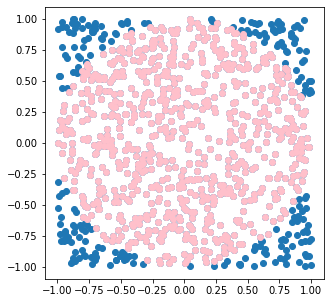

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def pi(N):
  np.random.seed(0)               # 난수 고정
  x = (np.random.rand(N))*2 -1    ### -1 ~ 1 사이의 1000개의 난수 생성
  y = (np.random.rand(N))*2 -1      ### -1 ~ 1 사이의 1000개의 난수 생성

  M = 0
  xincircle=[]
  yincircle=[]
  for i in range(N):
    if (x[i]**2 + y[i]**2 < 1):   # 원 안에 든 점
      M = M + 1
      xincircle.append(x[i])
      yincircle.append(y[i])
    else:
      continue
  
  return(4*M/N,x,y,xincircle,yincircle)

N=1000
print("원주율 추정치 :",pi(N)[0])
print("참 값과의 오차 :",pi(N)[0]-np.pi)

plt.rcParams['figure.figsize'] = (5, 5)
plt.scatter(pi(N)[1],pi(N)[2])
plt.scatter(pi(N)[3],pi(N)[4],color='pink')
plt.show()

# **Q1 - (b)**
(a)의 수치 실험을 $R = 10$번 반복하여 $\pi_s$의 평균 $<\pi>$과 표준편차 $σ$를 구하라. 이 수치실험 결과로 얻은 $\pi$이 보고할 값을 출력하라.

1. -1 ~ 1 사이의 난수를 $N = 1000$개 지정
2. 원 안($x^2 + y^2 < 1$)에 들어있는 점 개수($M$) 세기
3. $\pi_s = 4 \times \frac{M}{N}$
4. $R = 10$번 반복
5. 수치 실험 결과 $= < \pi_s> \pm   \frac{\sigma}{\sqrt{R}}$

In [ ]:
import numpy as np

def pi(N):
  x = np.random.rand(N)*2 - 1
  y = np.random.rand(N)*2 - 1

  M = 0
  for i in range(N):
    if (x[i]**2 + y[i]**2 < 1): # 원 안에 든 점
      M = M + 1
    else:
      continue

  return(4*M/N)

N=1000        # 점 개수 N
pis=[]
for i in range(10):    # 실험 횟수 R = 10
  pis.append(pi(N))

print("추정치 10개의 평균 :",np.mean(pis))
print("추정치 10개의 표준편차 :",np.std(pis))

print("수치실험 결과 : πs = %f ± %f" %(np.mean(pis),(np.std(pis)/(10**(1/2)))))

추정치 10개의 평균 : 3.1268000000000002
추정치 10개의 표준편차 : 0.05091325956958565
수치실험 결과 : πs = 3.126800 ± 0.016100


# **Q1 - (c)**
(a), (b)의 수치 실험에서 $N=100$을 사용하고 $R = 100$을 사용한 경우의 평균 $<\pi>$과 표준편차 $\sigma$, 보고할 값을 출력하라.

1. -1 ~ 1 사이의 난수를 $N = 100$개 지정
2. 원 안($x^2 + y^2 < 1$)에 들어있는 점 개수($M$) 세기
3. $\pi_s = 4 \times \frac{M}{N}$
4. $R = 100$번 반복
5. 결과 = $<\pi_s> \pm \frac{\sigma}{\sqrt{R}}$

In [ ]:
import numpy as np

def pi(N):
  x = np.random.rand(N)*2 - 1
  y = np.random.rand(N)*2 - 1

  M = 0
  for i in range(N):
    if (x[i]**2 + y[i]**2 < 1): # 원 안에 든 점
      M = M + 1
    else:
      continue

  return(4*M/N)

N = 100             # 점 개수 N
pis=[]
for i in range(100): # 실험 횟수 R = 100
  pis.append(pi(N))

print("추정치 100개의 평균 :",np.mean(pis))
print("추정치 100개의 표준편차 :",np.std(pis))

print("수치실험 결과 : πs = %f ± %f" %(np.mean(pis),(np.std(pis)/(100**(1/2)))))

추정치 100개의 평균 : 3.1563999999999997
추정치 100개의 표준편차 : 0.14989009306822113
수치실험 결과 : πs = 3.156400 ± 0.014989


---

# **Q2**
반지름 $R = 2$인 4차원 구의 부피를 몬테칼로 방법으로 구하라.

1. 4차원 구의 식
> $x_1^2 + x_2^2 + x_3^2 + x_4^2 \le R^2$
2. 반지름 $r$인 $n$차원 구의 부피 식
> $V = \frac{\pi^{n/2}}{\Gamma(\frac{n}{2}+1)} r^n$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def volume(N):
  np.random.seed(0)               # 난수 고정
  w = (np.random.rand(N))*4 -2    ### -2 ~ 2 사이의 1000개의 난수 생성
  x = (np.random.rand(N))*4 -2    ### -2 ~ 2 사이의 1000개의 난수 생성
  y = (np.random.rand(N))*4 -2      ### -2 ~ 2 사이의 1000개의 난수 생성
  z = (np.random.rand(N))*4 -2      ### -2 ~ 2 사이의 1000개의 난수 생성

  M = 0
  for i in range(N):
    if (w[i]**2 + x[i]**2 + y[i]**2 + z[i]**2 < 4):   # 4차원 구(R=2) 안에 든 점
      M = M + 1
    else:
      continue
  
  return((4**4)*M/N)

print("반지름 R = 2인 4차원 구의 부피 구하기")
N=100000  # 임의로 지정한 점 개수 N
print("몬테칼로 방법(실험값) :",volume(N))

n = 4        ### 4차원
R = 2        ### 반지름 R = 2
true_volume = (np.pi**(n/2)) * (R**n) / math.gamma(n/2 + 1)
print("공식(참값) :",true_volume)


반지름 R = 2인 4차원 구의 부피 구하기
몬테칼로 방법(실험값) : 78.96576
공식(참값) : 78.95683520871486
